In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## LGG Preprocessing

In [13]:
merged_df = pd.read_csv('raw_data/lgg_merged_drug_clinical.csv')

In [14]:
merged_df.shape

(695, 96)

In [15]:
merged_df.columns

Index(['bcr_patient_uuid', 'bcr_patient_barcode_x', 'bcr_drug_barcode',
       'bcr_drug_uuid', 'form_completion_date_x',
       'pharmaceutical_therapy_drug_name',
       'clinical_trial_drug_classification', 'pharmaceutical_therapy_type',
       'pharmaceutical_tx_started_days_to',
       'pharmaceutical_tx_ongoing_indicator',
       'pharmaceutical_tx_ended_days_to', 'treatment_best_response',
       'days_to_stem_cell_transplantation', 'pharm_regimen',
       'pharm_regimen_other', 'pharma_adjuvant_cycles_count',
       'pharma_type_other', 'pharmaceutical_tx_dose_units',
       'pharmaceutical_tx_total_dose_units', 'prescribed_dose',
       'regimen_number', 'route_of_administration',
       'stem_cell_transplantation', 'stem_cell_transplantation_type',
       'therapy_regimen', 'therapy_regimen_other', 'total_dose',
       'tx_on_clinical_trial', 'bcr_patient_barcode_y',
       'form_completion_date_y', 'histologic_diagnosis', 'tumor_grade',
       'laterality', 'tumor_site', 'su

In [16]:
interested_columns = ['bcr_patient_uuid', 'pharmaceutical_therapy_drug_name', 'pharmaceutical_therapy_type', 'treatment_outcome_at_tcga_followup',
                      'vital_status', 'tumor_status', 'followup_reason','treatment_outcome_first_course','treatment_best_response','death_days_to','gender','age_at_initial_pathologic_diagnosis','icd_10','tumor_tissue_site']

present_columns = [col for col in interested_columns if col in merged_df.columns]

target_df = merged_df[present_columns]
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   bcr_patient_uuid                     695 non-null    object
 1   pharmaceutical_therapy_drug_name     695 non-null    object
 2   pharmaceutical_therapy_type          695 non-null    object
 3   vital_status                         695 non-null    object
 4   tumor_status                         695 non-null    object
 5   treatment_outcome_first_course       695 non-null    object
 6   treatment_best_response              695 non-null    object
 7   death_days_to                        695 non-null    object
 8   gender                               695 non-null    object
 9   age_at_initial_pathologic_diagnosis  695 non-null    int64 
 10  icd_10                               695 non-null    object
 11  tumor_tissue_site                    695 non-

In [17]:
lgg_df.shape

(695, 12)

In [18]:
lgg_df.isnull().sum()

bcr_patient_uuid                       0
pharmaceutical_therapy_drug_name       0
pharmaceutical_therapy_type            0
vital_status                           0
tumor_status                           0
treatment_outcome_first_course         0
treatment_best_response                0
death_days_to                          0
gender                                 0
age_at_initial_pathologic_diagnosis    0
icd_10                                 0
tumor_tissue_site                      0
dtype: int64

## Checking DF For Unique Values

In [19]:
unique_patients = lgg_df['bcr_patient_uuid'].nunique()
print(f"Number of unique patients (by UUID): {unique_patients}")

Number of unique patients (by UUID): 285


In [20]:
pharmaceutical_therapy_type = lgg_df['pharmaceutical_therapy_type'].unique()
print(pharmaceutical_therapy_type.shape)
print("\nUnique pharmaceutical therapy type Names:\n", pharmaceutical_therapy_type)

(7,)

Unique pharmaceutical therapy type Names:
 ['Chemotherapy' 'Targeted Molecular therapy' 'Hormone Therapy'
 'Other, specify in notes' '[Not Available]' 'Immunotherapy' 'Ancillary']


In [21]:
pharmaceutical_therapy_drug_name = lgg_df['pharmaceutical_therapy_drug_name'].unique()
print(pharmaceutical_therapy_drug_name.shape)
print("\nUnique pharmaceutical drug type Names:\n", pharmaceutical_therapy_drug_name)

(90,)

Unique pharmaceutical drug type Names:
 ['Temodar' 'Avastin' 'Bevacizumab' 'Vinblastine' 'BCNU' 'Gleevec'
 'Temozolamide' 'Temozolomide' 'CDR0000654697' 'AT 101'
 'BCNU (carmustine)' 'Hydroxyurea' 'PCV' 'Carmustine BCNU' 'Tamoxifen'
 'Isotretinoin' 'Irinotecan' '9 Aminocamptothecin' 'Capecitabine'
 'Bromo deoxyuridine' 'Sorafenib (Bay 43-9006)' 'Procarbazine'
 'BCNU (Carmustine)' 'Gliadel Wafer' 'Carboplatin' 'PS-341 Bortrezomib'
 'Cilengitide' 'Isotrectinoin (acccutane)' 'Afatinib' 'Celebrex'
 'Lomustine' 'Vincristine' 'Lomustin' 'Tomaxifen' 'Irintotecan'
 'Temozlomide' 'temozolomide' 'Mibefradil' 'bevacizumab' 'Cilengtide'
 'Lomustine (CCNU)' 'SU101' 'ONYX-015' 'cis-retinoic acid'
 'Carmustine (BCNU)' 'CPT-11' 'CCNU' 'VP-16' 'Topotecan' 'Hydroyurea'
 'Cytoxan' 'CCNu' 'MAGI131-81c6' 'Karerltecin' 'Cloretazine'
 'Gliadel Wafers' 'Temazolomide' 'Tamoxiten' 'Gliadel wafers'
 'Benzylguanine' 'Karenitecin' 'Erlotinib' 'MR1-1' 'I131-81C6'
 'I 131 81C6' 'Gliadel' 'Thalidomide' 'Cyclop

In [22]:
treatment_best_response = lgg_df['treatment_best_response'].unique()
print(treatment_best_response.shape)
print("\nUnique treatment best response:\n", treatment_best_response)

(7,)

Unique treatment best response:
 ['[Not Available]' 'Stable Disease' 'Complete Response' '[Not Applicable]'
 'Partial Response' '[Unknown]' 'Clinical Progressive Disease']


In [23]:
vital_status = lgg_df['vital_status'].unique()
print(vital_status.shape)
print("\nUnique vital_status:\n", vital_status)

(2,)

Unique vital_status:
 ['Dead' 'Alive']


In [24]:
tumor_status = lgg_df['tumor_status'].unique()
print(tumor_status.shape)
print("\nUnique tumor_status:\n", tumor_status)

(5,)

Unique tumor_status:
 ['WITH TUMOR' 'TUMOR FREE' '[Not Available]' '[Unknown]' '[Discrepancy]']


In [25]:
treatment_outcome_first_course = lgg_df['treatment_outcome_first_course'].unique()
print(treatment_outcome_first_course.shape)
print("\nUnique treatment_outcome_first_course:\n", treatment_outcome_first_course)

(8,)

Unique treatment_outcome_first_course:
 ['[Not Available]' 'Stable Disease' 'Complete Remission/Response'
 '[Not Applicable]' '[Discrepancy]' '[Unknown]' 'Progressive Disease'
 'Partial Remission/Response']


In [26]:
gender = lgg_df['gender'].unique()
print(gender.shape)
print("\nUnique Gender Names:\n", gender)

(2,)

Unique Gender Names:
 ['MALE' 'FEMALE']


In [27]:
tumor_tissue_site = lgg_df['tumor_tissue_site'].unique()
print(tumor_tissue_site.shape)
print("\nUnique tumor_tissue_site Names:\n", tumor_tissue_site)

(1,)

Unique tumor_tissue_site Names:
 ['Central nervous system']


In [28]:
ambiguous_value_list = ['[Not Available]','[Not Applicable]','[Unknown]','[Discrepancy]','Other, specify in notes']

In [29]:
ambiguous_columns = lgg_df.columns[lgg_df.isin(ambiguous_value_list).any()]
print(f"Columns with ambiguous values: {ambiguous_columns}")

Columns with ambiguous values: Index(['pharmaceutical_therapy_type', 'tumor_status',
       'treatment_outcome_first_course', 'treatment_best_response',
       'death_days_to'],
      dtype='object')


In [30]:
for col in ambiguous_columns:
    # Get value counts for the column
    value_counts = lgg_df[col].value_counts()
    total_entries = value_counts.sum()  # Calculate total number of entries in the column

    print(f"Ambiguous values in column '{col}': (Total entries: {total_entries})")

    # Check for each ambiguous value
    for value in ambiguous_value_list:
        if value in value_counts:
            print(f"  {value}: {value_counts[value]}")
        else:
            print(f"  {value}: 0")  # If value is not found
    print()


Ambiguous values in column 'pharmaceutical_therapy_type': (Total entries: 695)
  [Not Available]: 13
  [Not Applicable]: 0
  [Unknown]: 0
  [Discrepancy]: 0
  Other, specify in notes: 9

Ambiguous values in column 'tumor_status': (Total entries: 695)
  [Not Available]: 24
  [Not Applicable]: 0
  [Unknown]: 12
  [Discrepancy]: 4
  Other, specify in notes: 0

Ambiguous values in column 'treatment_outcome_first_course': (Total entries: 695)
  [Not Available]: 356
  [Not Applicable]: 12
  [Unknown]: 30
  [Discrepancy]: 14
  Other, specify in notes: 0

Ambiguous values in column 'treatment_best_response': (Total entries: 695)
  [Not Available]: 313
  [Not Applicable]: 48
  [Unknown]: 20
  [Discrepancy]: 0
  Other, specify in notes: 0

Ambiguous values in column 'death_days_to': (Total entries: 695)
  [Not Available]: 0
  [Not Applicable]: 395
  [Unknown]: 0
  [Discrepancy]: 0
  Other, specify in notes: 0



In [31]:
# Replacing ambiguous_value_list with NAN
lgg_df = lgg_df.replace(ambiguous_value_list, pd.NA)

In [32]:
not_available_mask = lgg_df.isin(ambiguous_value_list)
not_available_counts = not_available_mask.sum()

print("\n[Not Available] counts per column:")
print(not_available_counts)


[Not Available] counts per column:
bcr_patient_uuid                       0
pharmaceutical_therapy_drug_name       0
pharmaceutical_therapy_type            0
vital_status                           0
tumor_status                           0
treatment_outcome_first_course         0
treatment_best_response                0
death_days_to                          0
gender                                 0
age_at_initial_pathologic_diagnosis    0
icd_10                                 0
tumor_tissue_site                      0
dtype: int64


In [33]:
lgg_df.isnull().sum()

bcr_patient_uuid                         0
pharmaceutical_therapy_drug_name         0
pharmaceutical_therapy_type             22
vital_status                             0
tumor_status                            40
treatment_outcome_first_course         412
treatment_best_response                381
death_days_to                          395
gender                                   0
age_at_initial_pathologic_diagnosis      0
icd_10                                   0
tumor_tissue_site                        0
dtype: int64

In [34]:
lgg_df['tumor_type'] = 'Low-grade gliomas'
lgg_df.to_csv('process_data/lgg_target_df.csv')

In [35]:
nan_percentage = lgg_df.isnull().sum() / len(merged_df) * 100

# Print the percentage of NaN for each column
print("Percentage of NaN values in each column:")
print(nan_percentage)

Percentage of NaN values in each column:
bcr_patient_uuid                        0.000000
pharmaceutical_therapy_drug_name        0.000000
pharmaceutical_therapy_type             3.165468
vital_status                            0.000000
tumor_status                            5.755396
treatment_outcome_first_course         59.280576
treatment_best_response                54.820144
death_days_to                          56.834532
gender                                  0.000000
age_at_initial_pathologic_diagnosis     0.000000
icd_10                                  0.000000
tumor_tissue_site                       0.000000
tumor_type                              0.000000
dtype: float64


In [36]:
lgg_df = lgg_df.drop_duplicates()

## GBM Preprocessing


In [38]:
merged_df = pd.read_csv('raw_data/gbm_merged_drug_clinical.csv')
merged_df.shape


(1505, 66)

In [39]:
merged_df.columns

Index(['bcr_patient_uuid', 'bcr_patient_barcode_x', 'bcr_drug_barcode',
       'bcr_drug_uuid', 'form_completion_date_x',
       'pharmaceutical_therapy_drug_name',
       'clinical_trial_drug_classification', 'pharmaceutical_therapy_type',
       'pharmaceutical_tx_started_days_to',
       'pharmaceutical_tx_ongoing_indicator',
       'pharmaceutical_tx_ended_days_to', 'treatment_best_response',
       'days_to_stem_cell_transplantation', 'pharm_regimen',
       'pharm_regimen_other', 'pharma_adjuvant_cycles_count',
       'pharma_type_other', 'pharmaceutical_tx_dose_units',
       'pharmaceutical_tx_total_dose_units', 'prescribed_dose',
       'regimen_number', 'route_of_administration',
       'stem_cell_transplantation', 'stem_cell_transplantation_type',
       'therapy_regimen', 'therapy_regimen_other', 'total_dose',
       'tx_on_clinical_trial', 'bcr_patient_barcode_y',
       'form_completion_date_y', 'history_lgg_dx_of_brain_tissue',
       'prospective_collection', 'retrospec

In [40]:
interested_columns = ['bcr_patient_uuid', 'pharmaceutical_therapy_drug_name', 'pharmaceutical_therapy_type', 'treatment_outcome_at_tcga_followup',
                      'vital_status', 'tumor_status', 'followup_reason','treatment_outcome_first_course','treatment_best_response','death_days_to','gender','age_at_initial_pathologic_diagnosis','icd_10','tumor_tissue_site']

present_columns = [col for col in interested_columns if col in merged_df.columns]

target_df_gbm = merged_df[present_columns]
target_df_gbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   bcr_patient_uuid                     1505 non-null   object
 1   pharmaceutical_therapy_drug_name     1505 non-null   object
 2   pharmaceutical_therapy_type          1505 non-null   object
 3   vital_status                         1505 non-null   object
 4   tumor_status                         1505 non-null   object
 5   treatment_outcome_first_course       1505 non-null   object
 6   treatment_best_response              1505 non-null   object
 7   death_days_to                        1505 non-null   object
 8   gender                               1505 non-null   object
 9   age_at_initial_pathologic_diagnosis  1505 non-null   int64 
 10  icd_10                               1505 non-null   object
 11  tumor_tissue_site                    1505 n

In [41]:
unique_patients = target_df_gbm['bcr_patient_uuid'].nunique()
print(f"Number of unique patients (by UUID): {unique_patients}")
pharmaceutical_therapy_type = target_df_gbm['pharmaceutical_therapy_type'].unique()
print(f'pharmaceutical_therapy_type shape:{pharmaceutical_therapy_type.shape}')
print("\nUnique pharmaceutical therapy type Names:\n", pharmaceutical_therapy_type)
pharmaceutical_therapy_drug_name = target_df_gbm['pharmaceutical_therapy_drug_name'].unique()
print(f'pharmaceutical_therapy_drug_name shape:{pharmaceutical_therapy_drug_name.shape}')
print("\nUnique pharmaceutical drug type Names:\n", pharmaceutical_therapy_drug_name)
treatment_best_response = target_df_gbm['treatment_best_response'].unique()
print(f'treatment_best_response shape:{treatment_best_response.shape}')
print("\nUnique treatment best response:\n", treatment_best_response)
vital_status = target_df_gbm['vital_status'].unique()
print(f'vital_status shape:{vital_status.shape}')
print("\nUnique vital_status:\n", vital_status)
tumor_status = target_df_gbm['tumor_status'].unique()
print(f'tumor_status shape:{tumor_status.shape}')
print("\nUnique tumor_status:\n", tumor_status)

Number of unique patients (by UUID): 443
pharmaceutical_therapy_type shape:(6,)

Unique pharmaceutical therapy type Names:
 ['Chemotherapy' 'Hormone Therapy' 'Immunotherapy'
 'Targeted Molecular therapy' '[Discrepancy]' '[Not Available]']
pharmaceutical_therapy_drug_name shape:(232,)

Unique pharmaceutical drug type Names:
 ['CRA' 'Celebrex' 'Cis Retinoic Acid' 'Tamoxifen' 'Temozolomide'
 'CIS Retinoic Acid' 'Thalidomide' 'CPT 11' 'Carboplatin' 'Iressa'
 'Anti necplatens' 'Gliadel Wafer' 'AE 788' '6 Thiguanine' 'Xeloda' 'CCNU'
 'Sarasar' 'Gleevec' 'Hydroxyurea' 'Tanceva' 'Temozomide' 'Bevacizumab'
 'Procarbizine' 'Vincristine' 'IL 13' 'Procarbazine' 'Tarceva'
 'Hydoxyurea' 'anti neopastons' 'VP-16' 'procarbazine' 'Cis-retinoic acid'
 'Temodar' 'Accutane' 'temozolomide' 'Suramin' 'BCNU' 'MGI 114' 'IL-13PE'
 'EMD' 'Avastin' 'CPT11' 'CAI NABIT 9712' 'Pyrazinamide' 'Cisplatin'
 'Carmustine (BCNU)' 'Taxol' 'Carmustine' 'Gliadel Wafers' 'Paclitaxel'
 'Gliadel wafer' 'CI 980' 'CI980' 'Carmust

In [42]:
ambiguous_columns = target_df_gbm.columns[target_df_gbm.isin(ambiguous_value_list).any()]
print(f"Columns with ambiguous values: {ambiguous_columns}")
for col in ambiguous_columns:
    # Get value counts for the column
    value_counts = target_df_gbm[col].value_counts()
    total_entries = value_counts.sum()  # Calculate total number of entries in the column

    print(f"Ambiguous values in column '{col}': (Total entries: {total_entries})")

    # Check for each ambiguous value
    for value in ambiguous_value_list:
        if value in value_counts:
            print(f"  {value}: {value_counts[value]}")
        else:
            print(f"  {value}: 0")  # If value is not found
    print()

Columns with ambiguous values: Index(['pharmaceutical_therapy_drug_name', 'pharmaceutical_therapy_type',
       'tumor_status', 'treatment_outcome_first_course',
       'treatment_best_response', 'death_days_to'],
      dtype='object')
Ambiguous values in column 'pharmaceutical_therapy_drug_name': (Total entries: 1505)
  [Not Available]: 5
  [Not Applicable]: 0
  [Unknown]: 0
  [Discrepancy]: 0
  Other, specify in notes: 0

Ambiguous values in column 'pharmaceutical_therapy_type': (Total entries: 1505)
  [Not Available]: 4
  [Not Applicable]: 0
  [Unknown]: 0
  [Discrepancy]: 1
  Other, specify in notes: 0

Ambiguous values in column 'tumor_status': (Total entries: 1505)
  [Not Available]: 74
  [Not Applicable]: 0
  [Unknown]: 0
  [Discrepancy]: 0
  Other, specify in notes: 0

Ambiguous values in column 'treatment_outcome_first_course': (Total entries: 1505)
  [Not Available]: 1457
  [Not Applicable]: 4
  [Unknown]: 15
  [Discrepancy]: 3
  Other, specify in notes: 0

Ambiguous values i

In [43]:
target_df_gbm = target_df_gbm.replace(ambiguous_value_list, pd.NA)

In [44]:
target_df_gbm.isnull().sum()

bcr_patient_uuid                          0
pharmaceutical_therapy_drug_name          5
pharmaceutical_therapy_type               5
vital_status                              0
tumor_status                             74
treatment_outcome_first_course         1479
treatment_best_response                1479
death_days_to                           405
gender                                    0
age_at_initial_pathologic_diagnosis       0
icd_10                                    0
tumor_tissue_site                         0
dtype: int64

In [45]:
target_df_gbm['tumor_type'] = 'Glioblastoma'
target_df_gbm.to_csv('process_data/gbm_target_df.csv')
nan_percentage = target_df_gbm.isnull().sum() / len(merged_df) * 100

# Print the percentage of NaN for each column
print("Percentage of NaN values in each column:")
print(nan_percentage)
target_df_gbm = target_df_gbm.drop_duplicates()

Percentage of NaN values in each column:
bcr_patient_uuid                        0.000000
pharmaceutical_therapy_drug_name        0.332226
pharmaceutical_therapy_type             0.332226
vital_status                            0.000000
tumor_status                            4.916944
treatment_outcome_first_course         98.272425
treatment_best_response                98.272425
death_days_to                          26.910299
gender                                  0.000000
age_at_initial_pathologic_diagnosis     0.000000
icd_10                                  0.000000
tumor_tissue_site                       0.000000
tumor_type                              0.000000
dtype: float64


## LGG Data Visualization

In [46]:
lgg_df = pd.read_csv('process_data/lgg_target_df.csv')

In [47]:
target_df = lgg_df.copy()

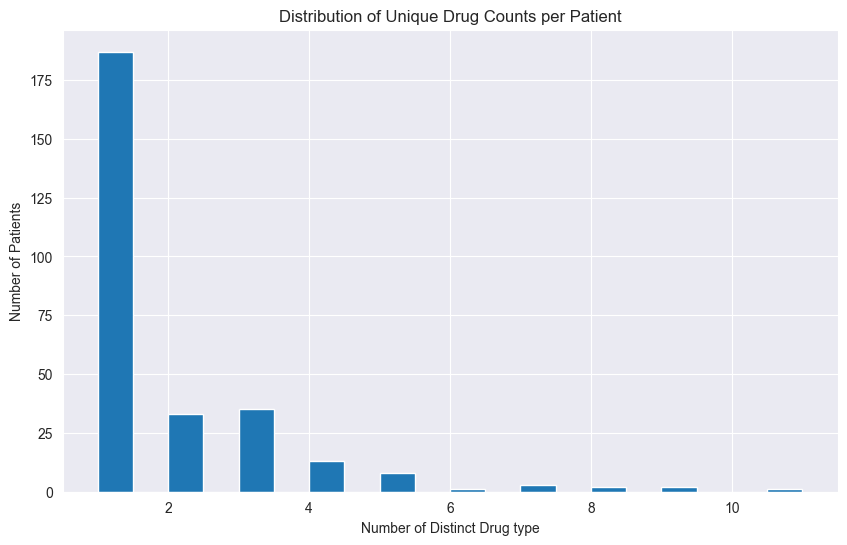

In [48]:
patient_therapy_count = .groupby('bcr_patient_uuid')['pharmaceutical_therapy_drug_name'].nunique()
patient_therapy_count.plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Unique Drug Counts per Patient')
plt.xlabel('Number of Distinct Drug type')
plt.ylabel('Number of Patients')
plt.show()

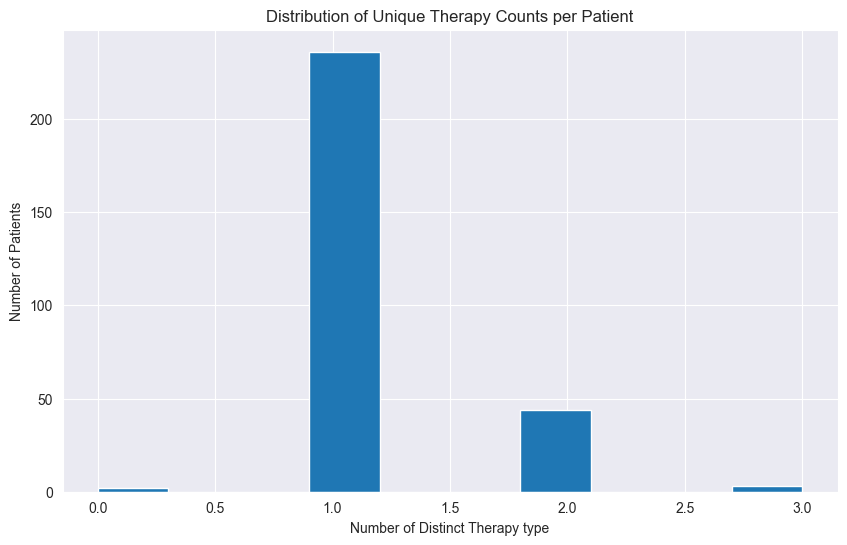

In [49]:
patient_therapy_count = lgg_df.groupby('bcr_patient_uuid')['pharmaceutical_therapy_type'].nunique()
patient_therapy_count.plot(kind='hist', bins=10, figsize=(10, 6), title='Distribution of Unique Therapy Counts per Patient')
plt.xlabel('Number of Distinct Therapy type')
plt.ylabel('Number of Patients')
plt.show()

In [50]:
# patient_therapy_count = target_df.groupby('bcr_patient_uuid')['treatment_outcome_at_tcga_followup'].nunique()
# patient_therapy_count.plot(kind='hist', bins=10, figsize=(10, 6), title='Distribution of Unique Treatment Outcome per Patient')
# plt.xlabel('Number of Distinct Treatment Outcome type')
# plt.ylabel('Number of Patients')
# plt.show()

In [51]:
# patient_therapy_count = target_df.groupby('bcr_patient_uuid')['treatment_outcome_first_course_x'].nunique()
# patient_therapy_count.plot(kind='hist', bins=10, figsize=(10, 6), title='Distribution of Unique Treatment Outcome First Responds per Patient')
# plt.xlabel('Number of Distinct treatment_outcome_first_course type')
# plt.ylabel('Number of Patients')
# plt.show()

C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\2155893269.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_days_to_death = target_df.groupby('age_group')['death_days_to'].mean()


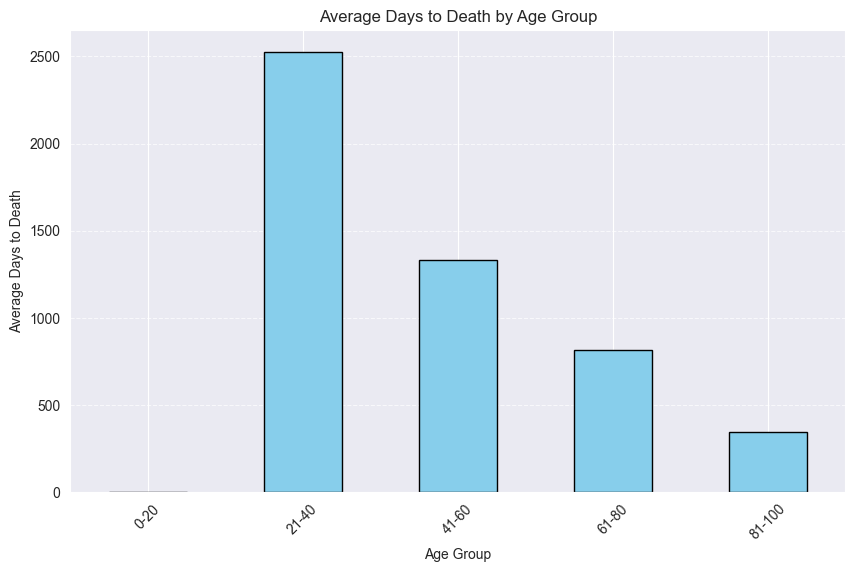

In [53]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
target_df['age_group'] = pd.cut(target_df['age_at_initial_pathologic_diagnosis'], bins=bins, labels=labels, right=False)

# Convert 'death_days_to_x' to numeric, replacing non-numeric values with NaN
target_df['death_days_to'] = pd.to_numeric(target_df['death_days_to'], errors='coerce')

# Calculate average days to death by age group
avg_days_to_death = target_df.groupby('age_group')['death_days_to'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
avg_days_to_death.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Days to Death by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Days to Death')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

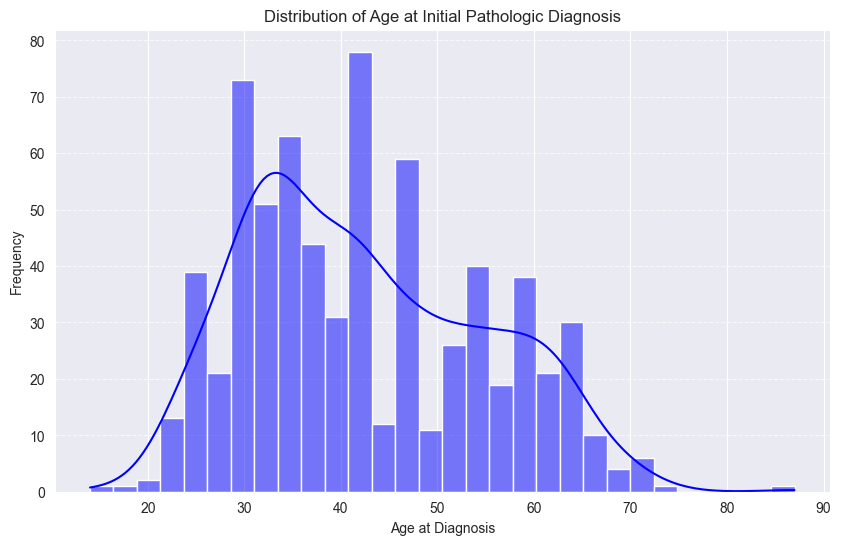

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(lgg_df['age_at_initial_pathologic_diagnosis'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age at Initial Pathologic Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

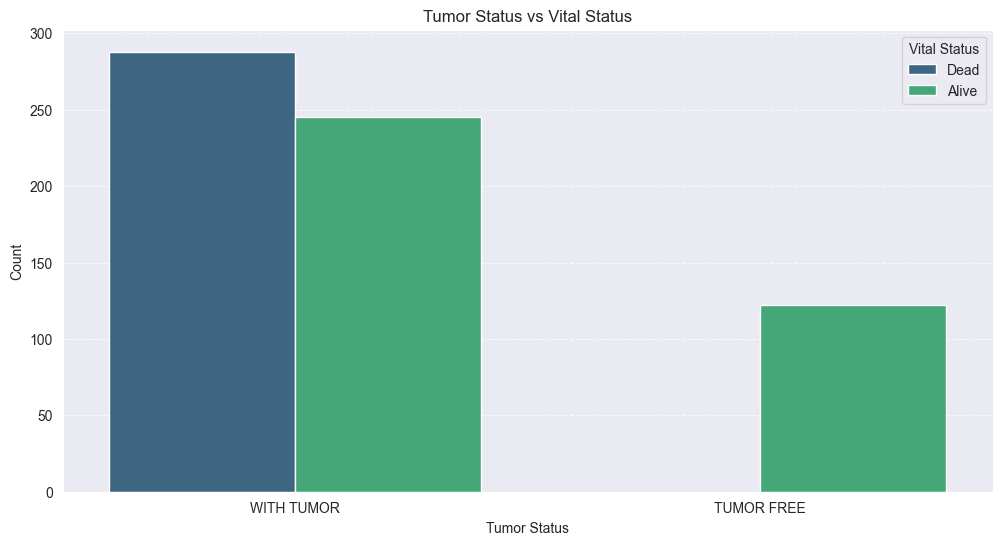

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(data=target_df, x='tumor_status', hue='vital_status', palette='viridis')
plt.title('Tumor Status vs Vital Status')
plt.xlabel('Tumor Status')
plt.ylabel('Count')
plt.legend(title='Vital Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

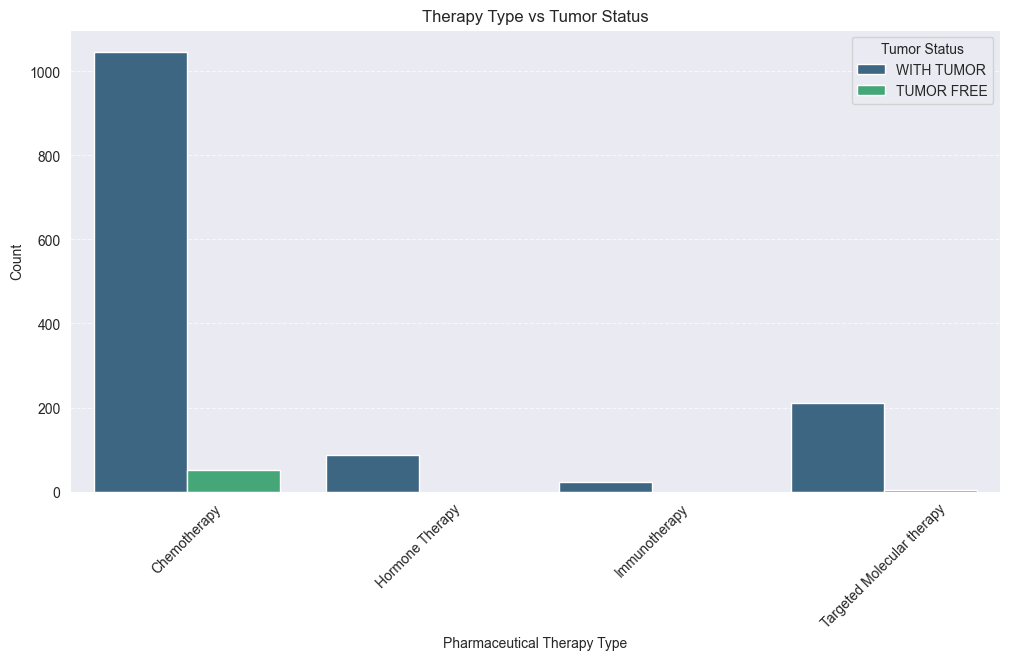

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(data=target_df, x='pharmaceutical_therapy_type', hue='tumor_status', palette='viridis')
plt.title('Therapy Type vs Tumor Status')
plt.xlabel('Pharmaceutical Therapy Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Tumor Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


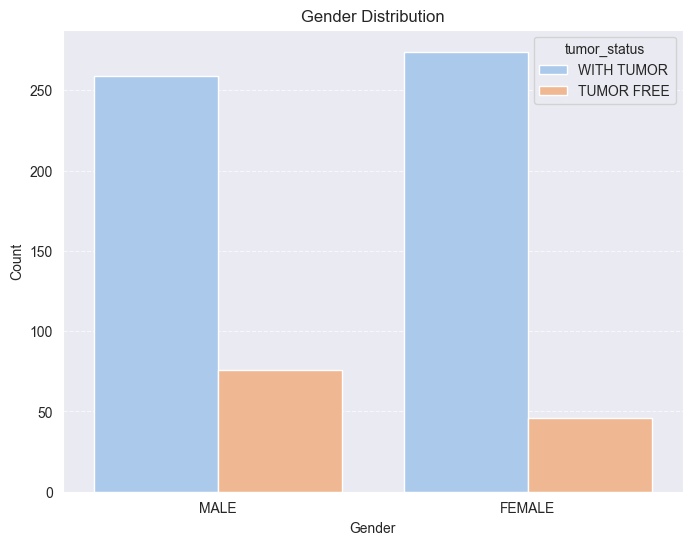

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(data=target_df, x='gender',hue='tumor_status', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [62]:
# plt.figure(figsize=(12, 6))
# sns.countplot(data=target_df, y='tumor_tissue_site', order=target_df['tumor_tissue_site'].value_counts().index)
# plt.title('Tumor Tissue Site Distribution')
# plt.xlabel('Count')
# plt.ylabel('Tumor Tissue Site')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


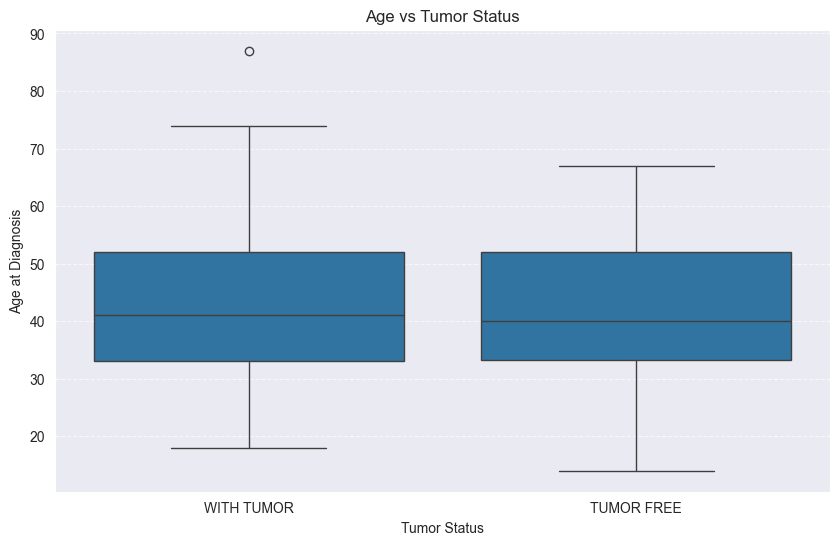

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=target_df, x='tumor_status', y='age_at_initial_pathologic_diagnosis')
plt.title('Age vs Tumor Status')
plt.xlabel('Tumor Status')
plt.ylabel('Age at Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\3830665092.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  therapy_age_counts = df.groupby(['pharmaceutical_therapy_type', 'age_group']).size().unstack(fill_value=0)


<Figure size 1500x1200 with 0 Axes>

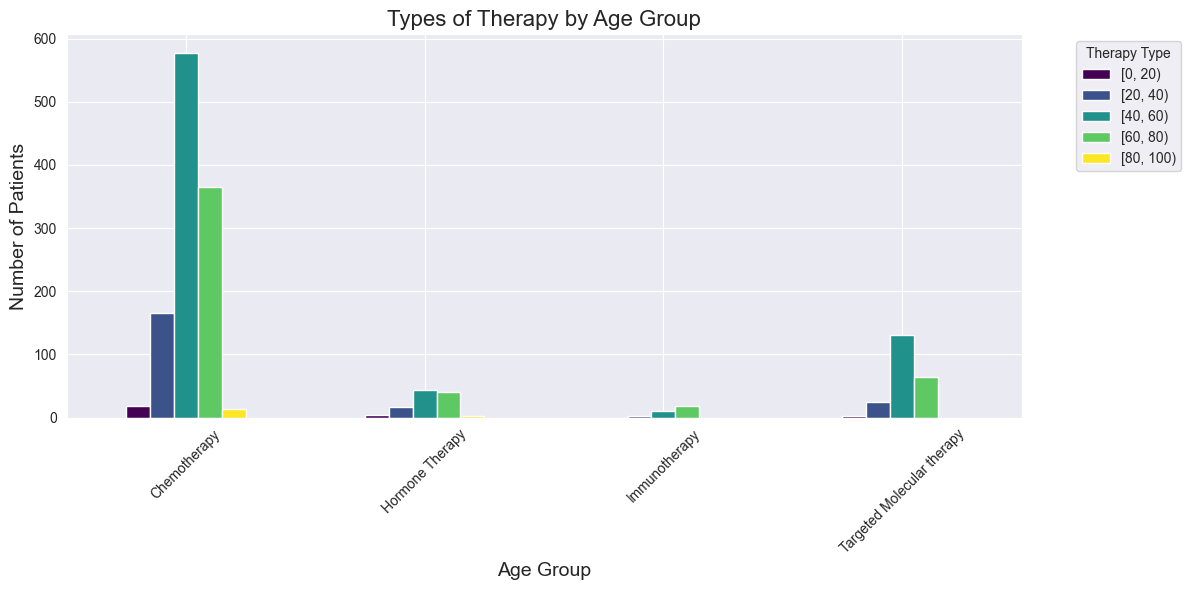

In [83]:
df = target_df.copy()
df['age_group'] = pd.cut(df['age_at_initial_pathologic_diagnosis'], bins=range(0, 101, 20), right=False)
# Step 2: Count the occurrences of each therapy type for each age group
# therapy_age_counts = df.groupby(['age_group', 'pharmaceutical_therapy_type']).size().unstack(fill_value=0)
therapy_age_counts = df.groupby(['pharmaceutical_therapy_type', 'age_group']).size().unstack(fill_value=0)

# Step 3: Plot the data
plt.figure(figsize=(15, 12))

# Use a grouped bar plot
therapy_age_counts.plot(kind='bar', stacked=False, colormap='viridis', figsize=(12, 6))

# Add labels and title
plt.title('Types of Therapy by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Therapy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [66]:
top_n_drugs = df['pharmaceutical_therapy_drug_name'].value_counts().nlargest(10).index
filtered_df = df[df['pharmaceutical_therapy_drug_name'].isin(top_n_drugs)]
# Create age bins to group ages into categories (e.g., 0-10, 10-20, etc.)
filtered_df['age_group'] = pd.cut(filtered_df['age_at_initial_pathologic_diagnosis'], bins=range(0, 101, 10), right=False)

# Group by age group and drug type, and count occurrences
drug_age_counts = filtered_df.groupby(['age_group', 'pharmaceutical_therapy_drug_name']).size().unstack(fill_value=0)

C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\4213179228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = pd.cut(filtered_df['age_at_initial_pathologic_diagnosis'], bins=range(0, 101, 10), right=False)
C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\4213179228.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drug_age_counts = filtered_df.groupby(['age_group', 'pharmaceutical_therapy_drug_name']).size().unstack(fill_value=0)


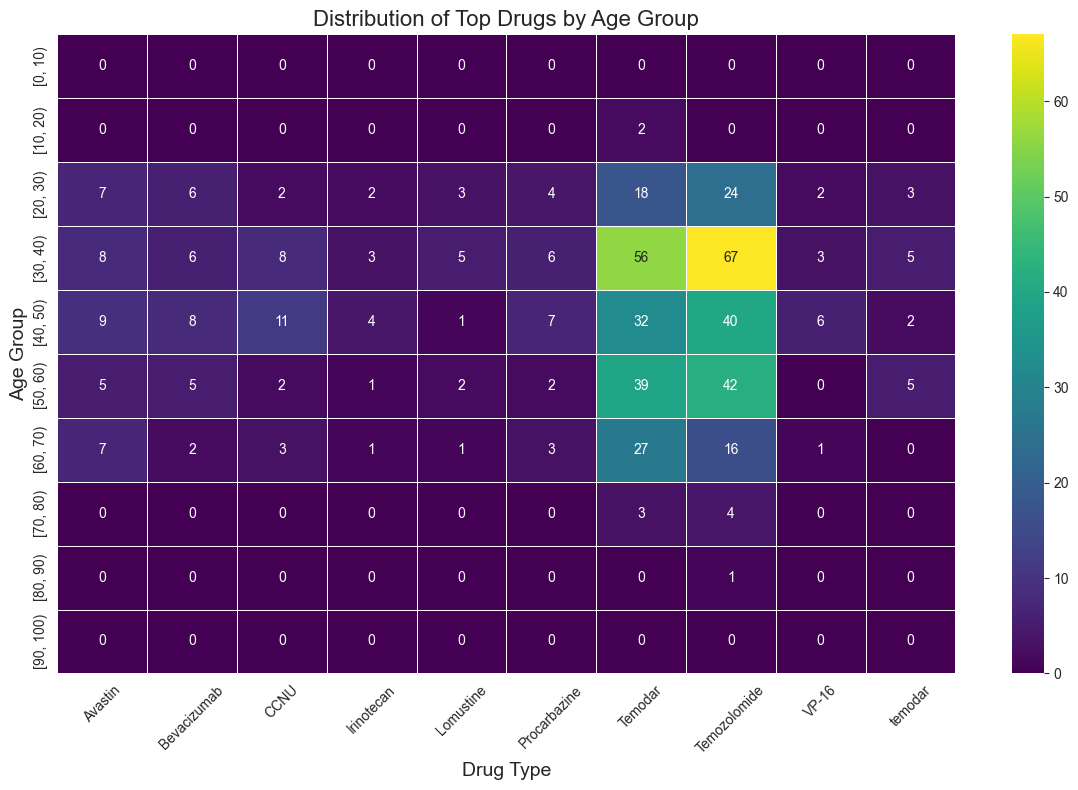

In [67]:
# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(drug_age_counts, annot=True, fmt='d', cmap='viridis', linewidths=0.5)

# Add labels and title
plt.title('Distribution of Top Drugs by Age Group', fontsize=16)
plt.xlabel('Drug Type', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## GBM Visualization

In [68]:
gbm_df = pd.read_csv('process_data/gbm_target_df.csv')
target_df = gbm_df.copy()


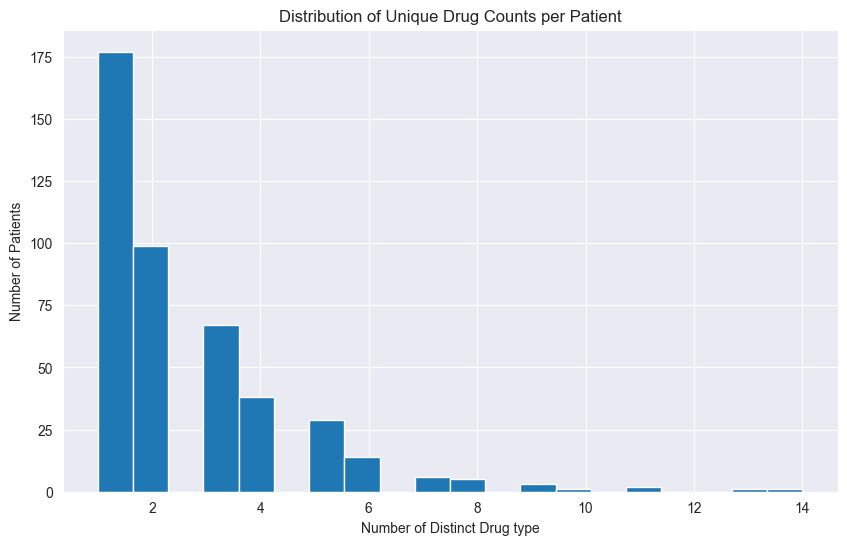

In [69]:
patient_therapy_count = target_df.groupby('bcr_patient_uuid')['pharmaceutical_therapy_drug_name'].nunique()
patient_therapy_count.plot(kind='hist', bins=20, figsize=(10, 6),
                           title='Distribution of Unique Drug Counts per Patient')
plt.xlabel('Number of Distinct Drug type')
plt.ylabel('Number of Patients')
plt.show()


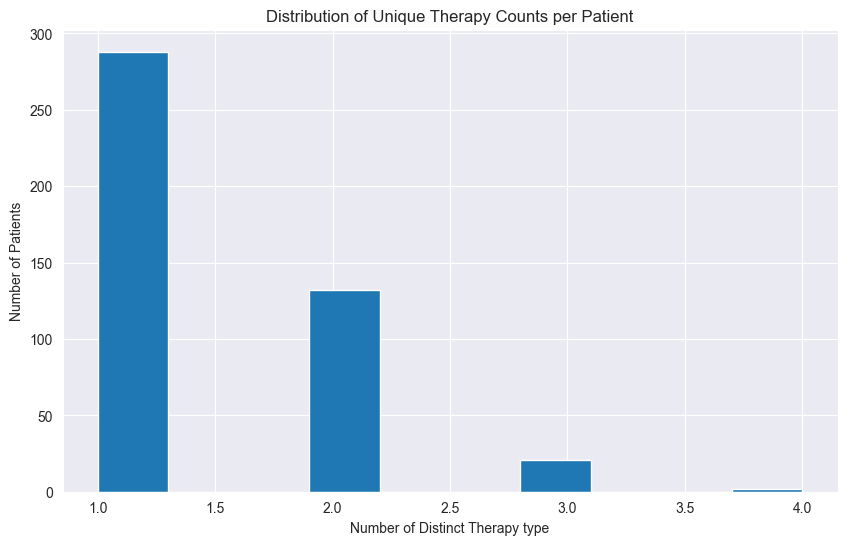

In [70]:
patient_therapy_count = target_df.groupby('bcr_patient_uuid')['pharmaceutical_therapy_type'].nunique()
patient_therapy_count.plot(kind='hist', bins=10, figsize=(10, 6),
                           title='Distribution of Unique Therapy Counts per Patient')
plt.xlabel('Number of Distinct Therapy type')
plt.ylabel('Number of Patients')
plt.show()



C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\1862528431.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_days_to_death = target_df.groupby('age_group')['death_days_to'].mean()


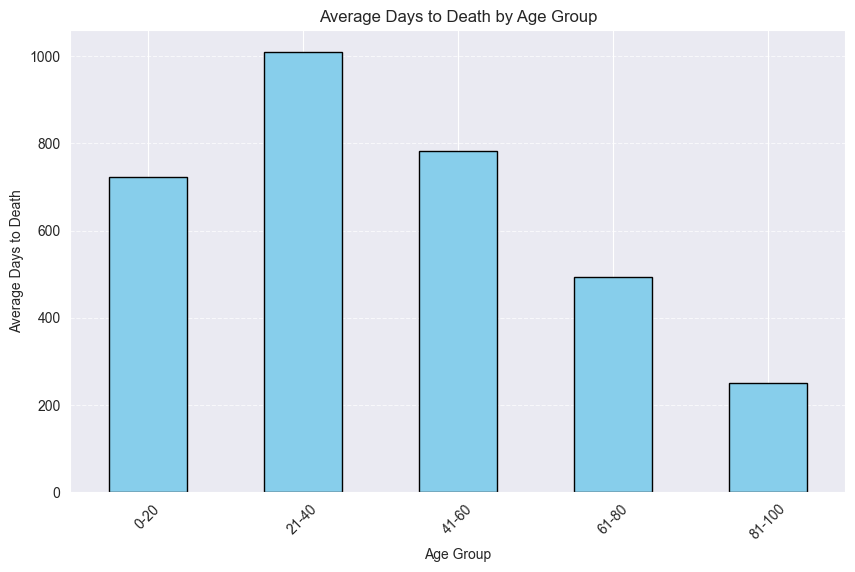

In [71]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
target_df['age_group'] = pd.cut(target_df['age_at_initial_pathologic_diagnosis'], bins=bins, labels=labels, right=False)

# Convert 'death_days_to_x' to numeric, replacing non-numeric values with NaN
target_df['death_days_to'] = pd.to_numeric(target_df['death_days_to'], errors='coerce')

# Calculate average days to death by age group
avg_days_to_death = target_df.groupby('age_group')['death_days_to'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
avg_days_to_death.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Days to Death by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Days to Death')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


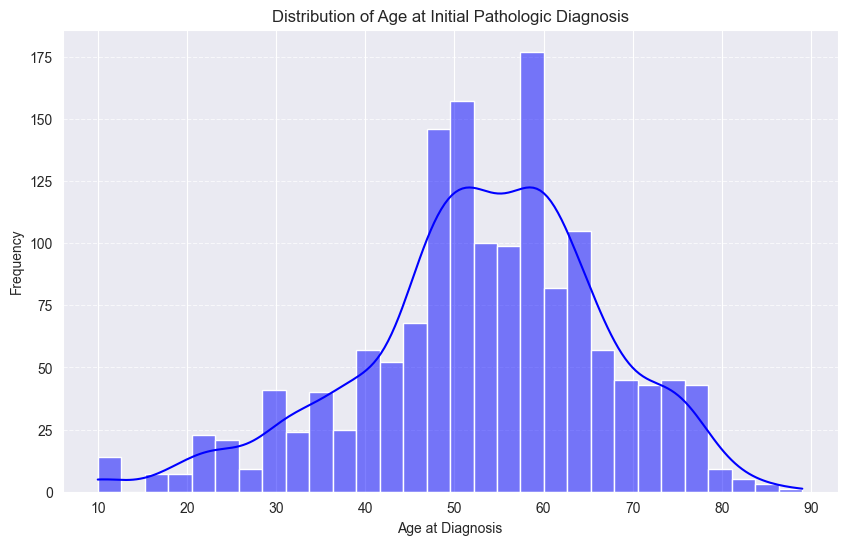

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(target_df['age_at_initial_pathologic_diagnosis'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age at Initial Pathologic Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


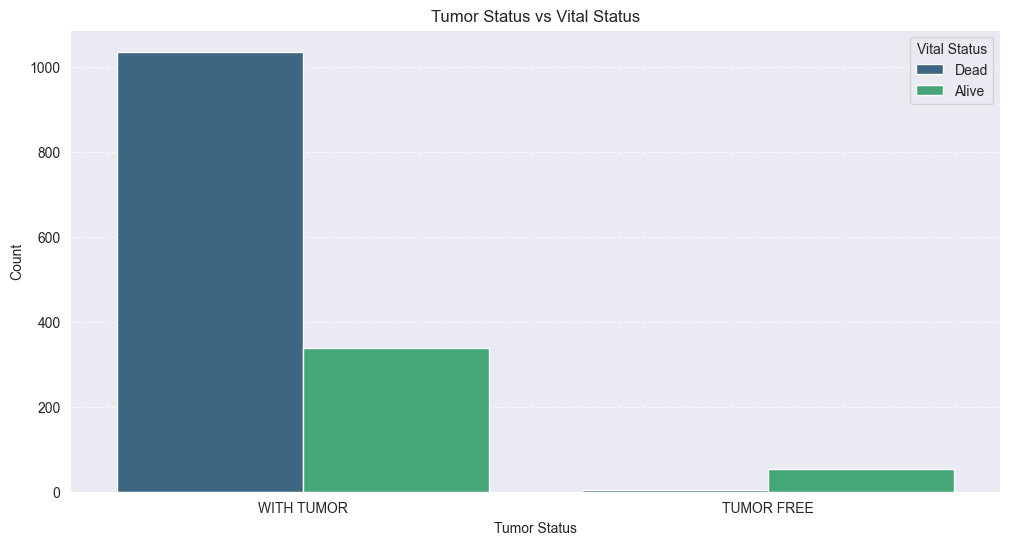

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(data=target_df, x='tumor_status', hue='vital_status', palette='viridis')
plt.title('Tumor Status vs Vital Status')
plt.xlabel('Tumor Status')
plt.ylabel('Count')
plt.legend(title='Vital Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


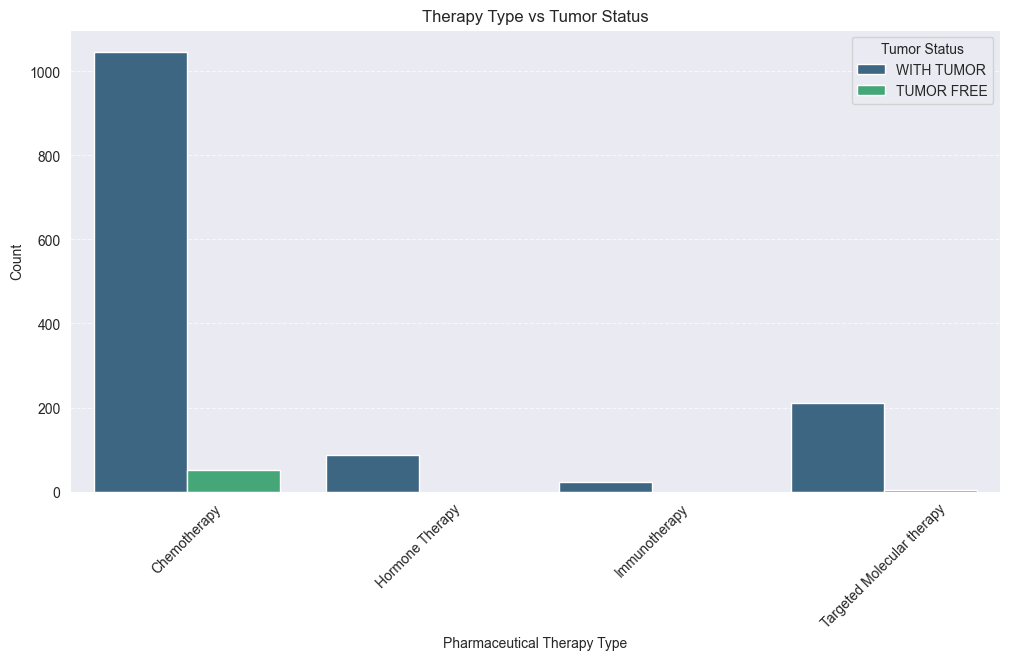

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(data=target_df, x='pharmaceutical_therapy_type', hue='tumor_status', palette='viridis')
plt.title('Therapy Type vs Tumor Status')
plt.xlabel('Pharmaceutical Therapy Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Tumor Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



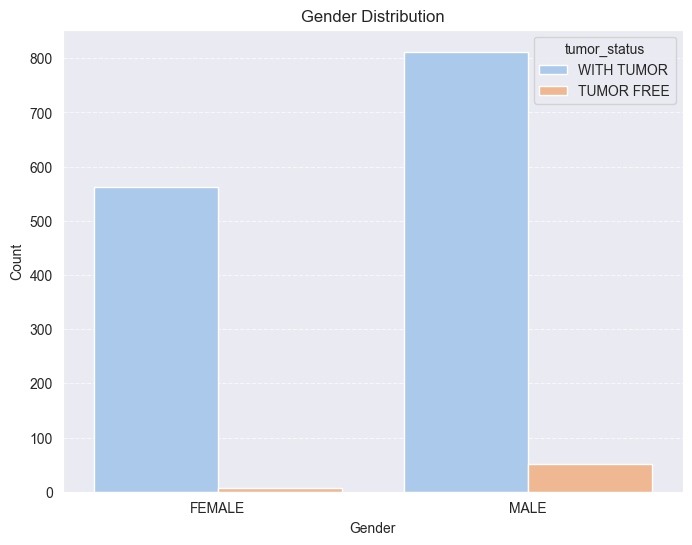

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(data=target_df, x='gender', hue='tumor_status', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





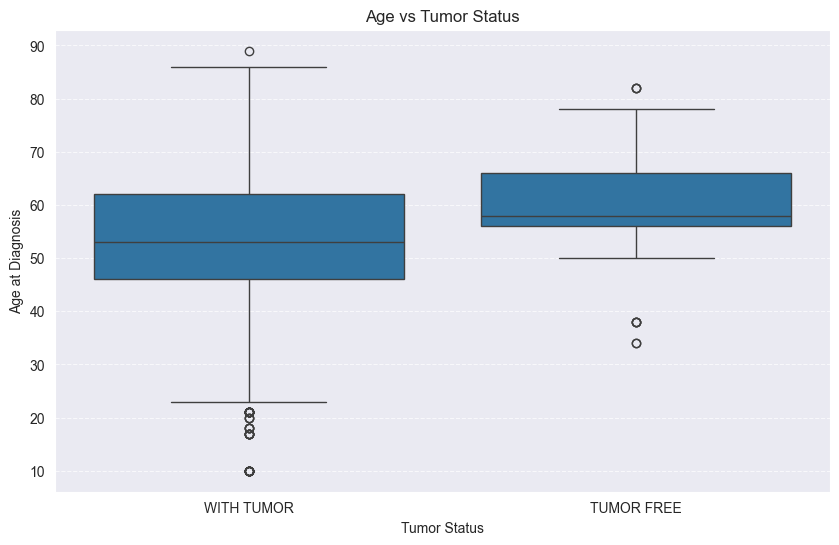

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=target_df, x='tumor_status', y='age_at_initial_pathologic_diagnosis')
plt.title('Age vs Tumor Status')
plt.xlabel('Tumor Status')
plt.ylabel('Age at Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\3168486738.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  therapy_age_counts = df.groupby(['age_group', 'pharmaceutical_therapy_type']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

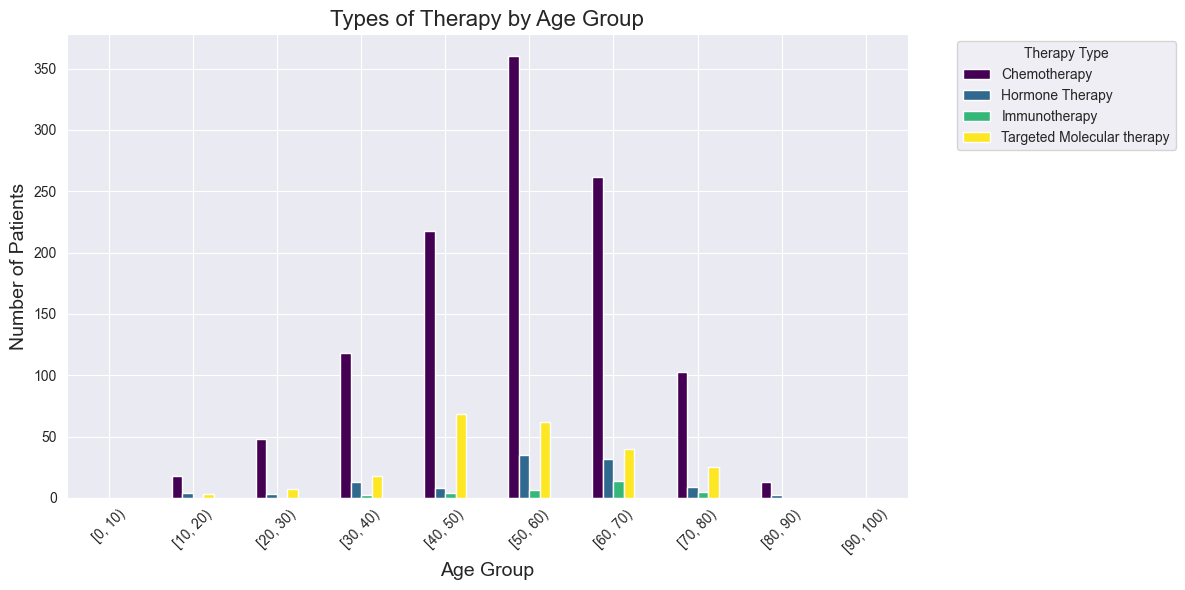

In [77]:
df = target_df.copy()
df['age_group'] = pd.cut(df['age_at_initial_pathologic_diagnosis'], bins=range(0, 101, 10), right=False)
# Step 2: Count the occurrences of each therapy type for each age group
therapy_age_counts = df.groupby(['age_group', 'pharmaceutical_therapy_type']).size().unstack(fill_value=0)

# Step 3: Plot the data
plt.figure(figsize=(12, 6))

# Use a grouped bar plot
therapy_age_counts.plot(kind='bar', stacked=False, colormap='viridis', figsize=(12, 6))

# Add labels and title
plt.title('Types of Therapy by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Therapy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\2238121189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = pd.cut(filtered_df['age_at_initial_pathologic_diagnosis'], bins=range(0, 101, 10),
C:\Users\mawuk\AppData\Local\Temp\ipykernel_16428\2238121189.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drug_age_counts = filtered_df.groupby(['age_group', 'pharmaceutical_therapy_drug_name']).size().unstack(fill_value=0)


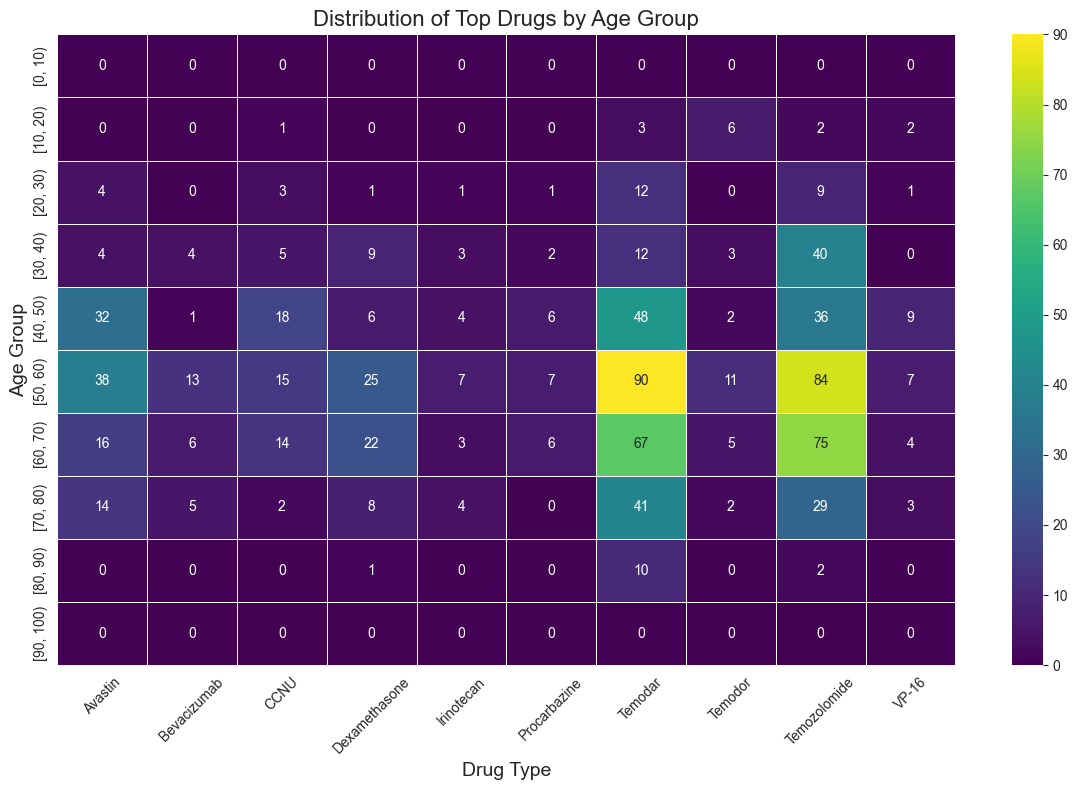

In [78]:
top_n_drugs = df['pharmaceutical_therapy_drug_name'].value_counts().nlargest(10).index
filtered_df = df[df['pharmaceutical_therapy_drug_name'].isin(top_n_drugs)]
# Create age bins to group ages into categories (e.g., 0-10, 10-20, etc.)
filtered_df['age_group'] = pd.cut(filtered_df['age_at_initial_pathologic_diagnosis'], bins=range(0, 101, 10),
                                  right=False)

# Group by age group and drug type, and count occurrences
drug_age_counts = filtered_df.groupby(['age_group', 'pharmaceutical_therapy_drug_name']).size().unstack(fill_value=0)
# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(drug_age_counts, annot=True, fmt='d', cmap='viridis', linewidths=0.5)

# Add labels and title
plt.title('Distribution of Top Drugs by Age Group', fontsize=16)
plt.xlabel('Drug Type', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()